In [19]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.manifold import TSNE

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv")

# Display sample data
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [21]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   coin_id                       41 non-null     object 
 1   price_change_percentage_24h   41 non-null     float64
 2   price_change_percentage_7d    41 non-null     float64
 3   price_change_percentage_14d   41 non-null     float64
 4   price_change_percentage_30d   41 non-null     float64
 5   price_change_percentage_60d   41 non-null     float64
 6   price_change_percentage_200d  41 non-null     float64
 7   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.7+ KB


In [22]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [23]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [25]:
df_market_data.columns

Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [26]:
data_columns = ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

In [27]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_sub = df_market_data.loc[:, data_columns]

# scale
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

StandardScaler()

In [28]:
# Create a DataFrame with the scaled data
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=data_columns)


# Set the coinid column as index
df_scaled["coin_id"] = df_market_data.coin_id

# Display sample data
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_id
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash


---

### Find the Best Value for k Using the Original Data.

In [29]:
# Create a list with the number of k-values from 1 to 11
k = list(range(2,12))

In [30]:
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
c_score = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
F = df_scaled.loc[:, data_columns]

for i in k: 
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(F)
    
    # predict the model
    preds = k_model.predict(F)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(F, preds)
    silhouettes.append(score)
    
    c_scores = calinski_harabasz_score(F, preds)
    c_score.append(c_scores)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [31]:
# Create a dictionary with the data to plot the Elbow curve
elbow = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": c_score}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow)
df_elbow.head()

,k,inertia,silhouette_score,cha_score
0,2,195.820218,0.651576,18.159573
1,3,123.190482,0.702822,25.264783
2,4,79.022435,0.314482,32.459853
3,5,63.858668,0.329023,31.448698
4,6,53.057788,0.287883,30.864375


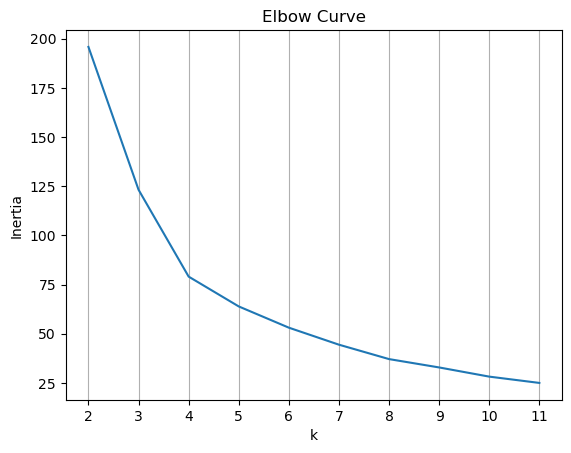

In [32]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("Inertia")
plt.xlabel("k")
plt.grid(axis = 'x')
plt.show()

In [33]:
# I chose to use matplotlib above as I prefer the cleaner, less zoomed look, the hvplot is below
elbow1 = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
elbow1

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [34]:
# Initialize the K-Means model using the best value for k
k_model2 = KMeans(n_clusters=4, random_state=1)

In [35]:
# Fit the K-Means model using the scaled data
k_model2.fit(F)

KMeans(n_clusters=4, random_state=1)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled data
pred = k_model2.predict(F)
print(pred)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [37]:
# Create a copy of the DataFrame
df_scaled2 = df_scaled.copy()

In [38]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled2['clusters'] = pred

# Display sample data
df_scaled2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_id,clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin,2
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum,2
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether,0
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple,0
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash,2


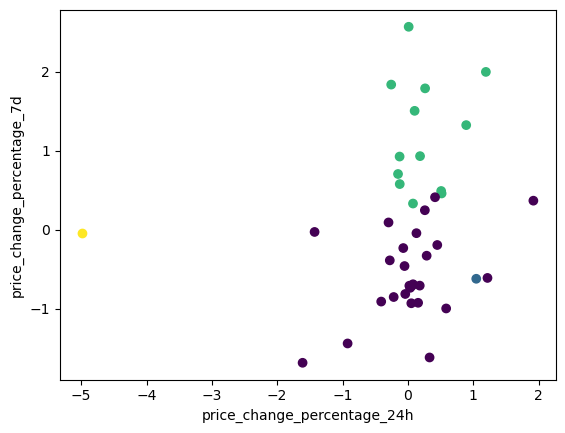

In [39]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plt.scatter(df_scaled2["price_change_percentage_24h"], df_scaled2["price_change_percentage_7d"], c=df_scaled2.clusters)
plt.ylabel("price_change_percentage_7d")
plt.xlabel("price_change_percentage_24h")
plt.show()

In [40]:
# Above I used matplotlib as I believe it shows a cleaner graph. I will add the hvplot below:
hvplot1 = df_scaled2.hvplot.scatter(width=600, height=400, x="price_change_percentage_24h", y="price_change_percentage_7d", by="clusters", hover_cols="coin_id")
hvplot1

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [41]:
df_scaled2.clusters.value_counts()

clusters
0    26
2    13
3     1
1     1
Name: count, dtype: int64

---

### Optimize Clusters with Principal Component Analysis.

In [42]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [43]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled.loc[:, data_columns])
# View the first five rows of the DataFrame. 
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [44]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is .89503166

In [45]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns = ["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
df_pca["coin_id"] = df_scaled.coin_id


# Display sample data
df_pca.head()

,PC1,PC2,PC3,coin_id
0,-0.600667,0.842760,0.461595,bitcoin
1,-0.458261,0.458466,0.952877,ethereum
2,-0.433070,-0.168126,-0.641752,tether
3,-0.471835,-0.222660,-0.479053,ripple
4,-1.157800,2.041209,1.859715,bitcoin-cash


---

### Find the Best Value for k Using the PCA Data

In [46]:
# Create a list with the number of k-values from 1 to 11
k = list(range(2,12))

In [47]:
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
c_score = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
F = df_pca.loc[:, ["PC1", "PC2", "PC3"]]

for i in k: 
    k_model3 = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model3.fit(F)
    
    # predict the model
    preds = k_model3.predict(F)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model3.inertia_)
    score = silhouette_score(F, preds)
    silhouettes.append(score)
    
    c_scores = calinski_harabasz_score(F, preds)
    c_score.append(c_scores)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [48]:
# Create a dictionary with the data to plot the Elbow curve
elbow2 = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": c_score}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow2 = pd.DataFrame(elbow2)
df_elbow2.head()

,k,inertia,silhouette_score,cha_score
0,2,165.901994,0.693036,21.385587
1,3,93.774626,0.741509,33.046144
2,4,49.665497,0.420800,51.455694
3,5,38.072792,0.359902,51.722281
4,6,27.720626,0.401468,57.865728


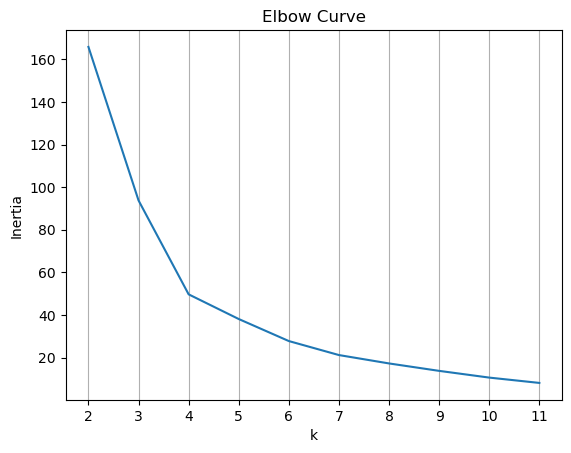

In [49]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow2["k"], df_elbow2["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("Inertia")
plt.xlabel("k")
plt.grid(axis = 'x')
plt.show()

In [50]:
# I chose to use matplotlib above as I prefer the cleaner, less zoomed look, the hvplot is below
elbow2 = df_elbow2.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
elbow2

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It is slightly more clear, but still similar.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [51]:
# Initialize the K-Means model using the best value for k
k_model4 = KMeans(n_clusters=4, random_state=1)

In [52]:
# Fit the K-Means model using the PCA data
k_model4.fit(F)

KMeans(n_clusters=4, random_state=1)

In [53]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pred2 = k_model4.predict(F)
# Print the resulting array of cluster values.
print(pred2)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [54]:
# Create a copy of the DataFrame with the PCA data
df_pca2 = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca2['clusters'] = pred2

# Display sample data
df_pca2.head()

,PC1,PC2,PC3,coin_id,clusters
0,-0.600667,0.842760,0.461595,bitcoin,2
1,-0.458261,0.458466,0.952877,ethereum,2
2,-0.433070,-0.168126,-0.641752,tether,0
3,-0.471835,-0.222660,-0.479053,ripple,0
4,-1.157800,2.041209,1.859715,bitcoin-cash,2


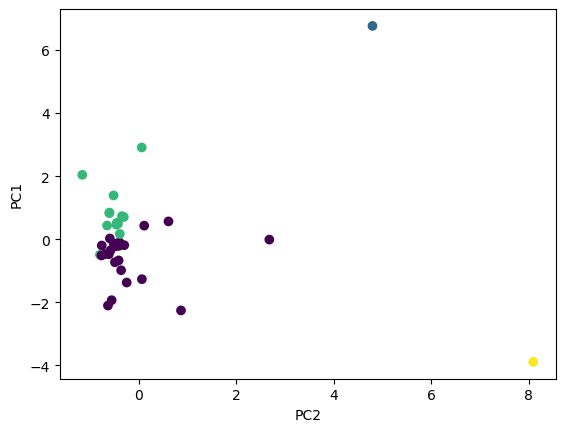

In [55]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plt.scatter(df_pca2["PC1"], df_pca2["PC2"], c=df_pca2.clusters)
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.show()

In [56]:
# Above I used matplotlib as I believe it shows a cleaner graph. I will add the hvplot below:
hvplot2 = df_pca2.hvplot.scatter(width=600, height=400, x="PC1", y="PC2", by="clusters", hover_cols="coin_id")
hvplot2

:NdOverlay   [clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [57]:
# Composite plot to contrast the Elbow curves
elbow_plots = (elbow1 + elbow2)
elbow_plots

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [58]:
# Composite plot to contrast the clusters
hvplots = (hvplot1 + hvplot2)
hvplots

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The PCA plot showed in more clear fashion that there were 2 main clusters and 2 outliers. I would recommend the PCA method for this dataset.